In [1]:
# PCA EXAMPLE DIMENSIONS REDUCTION TECHNIQUE

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.model_selection import train_test_split

In [3]:
warnings.filterwarnings('ignore')

In [4]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
# digits.data[0].reshape(4,4,4)
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
def plot_img(index):
    plt.figure(figsize=(2,2))
    plt.gray()
    plt.imshow(digits.data[index].reshape(8,8))
    plt.axis('off')
    plt.title("THIS IS " + str(digits.target[index]))

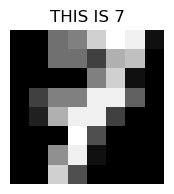

In [9]:
plot_img(7)

In [10]:
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
X = df.drop('target', axis='columns')
y = df.target

In [13]:
def scaled_df(df):
    for i in df:
        df[i] = MinMaxScaler().fit_transform(df[[i]])

In [14]:
scaled_df(X)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


In [15]:
cross_val_score(LinearRegression(), X, y, cv=5)

array([ 4.83460482e-01, -5.90200711e+16,  5.74486029e-01,  5.05663203e-01,
        4.09954573e-01])

In [16]:
cross_val_score(LogisticRegression(), X, y, cv=5)

array([0.93611111, 0.88888889, 0.94986072, 0.9637883 , 0.90250696])

In [17]:
cross_val_score(SVC(C=10, kernel='rbf'), X, y, cv=5)

array([0.98055556, 0.96111111, 0.98328691, 0.99164345, 0.95821727])

In [18]:
cross_val_score(RandomForestClassifier(n_estimators=200), X, y, cv=5)

array([0.93055556, 0.91666667, 0.96100279, 0.95543175, 0.93036212])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
model = SVC(C=10)
model.fit(X_train, y_train)

SVC(C=10)

In [21]:
model.score(X_test, y_test)

0.9833333333333333

# NOW APPLY PCA TO REDUCES DIMESIONS

In [22]:
from sklearn.decomposition import PCA

PCA_df = PCA(0.95).fit_transform(df)

In [23]:
PCA_df

array([[ -1.11561689,  21.34068919,  -9.36633735, ...,  -3.69656406,
         -0.66831688,  -1.17754561],
       [  7.95481232, -20.661232  ,   4.77722493, ...,  -1.90722887,
         -1.18374516,   2.32086756],
       [  7.01666565,  -9.87305262,   3.19492399, ...,  -4.27272598,
          1.64759955,   0.90489499],
       ...,
       [ 10.73240501,  -7.04862571,   5.46899338, ...,   3.30630351,
          2.23612987,   3.57405265],
       [ -4.93052351,  12.24961277, -10.47395994, ...,  -2.92450014,
         -0.46550271,  -0.84657812],
       [ -0.36160993,   6.3284344 ,  10.50926251, ...,   2.84508498,
          1.45065928,   2.62912422]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(PCA_df, y, test_size=0.2)

In [25]:
cross_val_score(LinearRegression(), X_train, y_train, cv=5)

array([0.73527771, 0.68189771, 0.71993556, 0.70445354, 0.71590629])

In [26]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

array([0.97569444, 0.98263889, 0.9825784 , 0.97560976, 0.95818815])

In [27]:
cross_val_score(SVC(C=1), X_train, y_train, cv=5)

array([1.        , 0.99652778, 0.99303136, 0.97909408, 0.9825784 ])

In [28]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)

array([0.95486111, 0.96875   , 0.97560976, 0.97212544, 0.96864111])

In [29]:
model = SVC(C=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9888888888888889

In [32]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 27]], dtype=int64)

Text(70.72222222222221, 0.5, 'Trust')

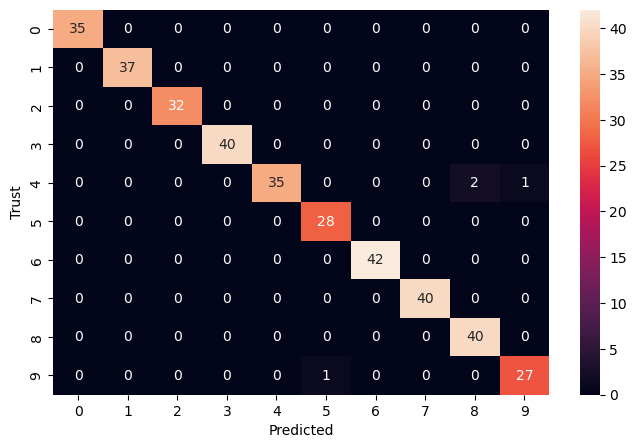

In [41]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Trust")